<IPython.core.display.Javascript object>


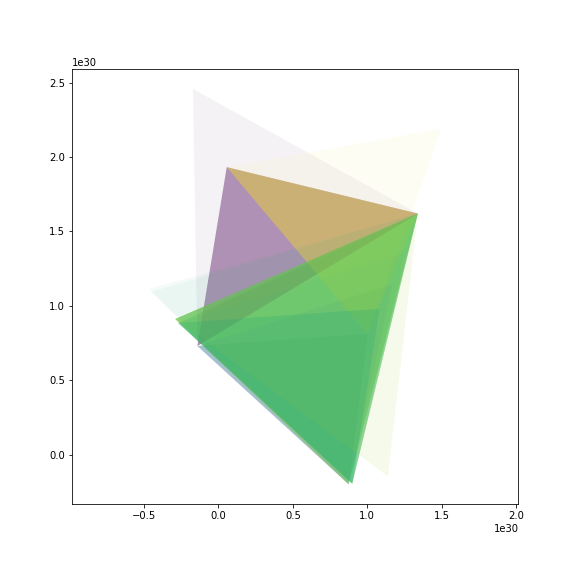

In [30]:
%matplotlib notebook

import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


# Number of points
N = 9

# How far they step each iteration
step = 0.05

pts = np.random.rand(N, 2)
#pts = np.array([[0.,0.],[0.,1.],[1.,0.]])

choices = np.zeros((N, 3), dtype=np.int)
for i in range(N):
    cs = np.random.choice(N-1, 2, replace=False)
    choices[i] = [i] + [j % N for j in sorted([c + 1 if c >= i else c + N for c in cs])]
#choices=[[0, 2, 1],[1, 2, 0],[2, 0, 3],[3, 2, 0]]


# Find the third point of equilateral triangle nearest to a third point
def eq_tri(pts, cur):
    c, s = np.cos(np.pi/3), np.sin(np.pi/3)
    R = np.array([[c, -s], [s, c]])
    res =  pts + np.linalg.multi_dot([R, pts.T, np.array([[-1,1],[1, -1]])]).T
    idx = (np.linalg.norm(res-cur*2,axis=1)).argmin()
    print pts, cur, idx, res[idx]
    return res[idx]

# Make everyone move towards their nearest equilateral triangle
def update_pts():
    new_pts = copy.copy(pts)
    for i in range(N):
        tri = new_pts[choices[i]]
        cur = tri[0]
        ideal = eq_tri(tri[1:3], cur)
        #step = 0.1 + 0.1 * np.random.rand()
        new_pts[i] = cur + (ideal - cur) * step
    pts[:] = new_pts[:]

    
# Animation
plt.close()
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
ax.set_aspect('equal', 'datalim')

colors = 200*np.random.rand(N)          

def animate(t):
    update_pts()
    patches = []
    ideals = []
    ax.clear()
    for i in range(N):
        tri = pts[choices[i]]
        cur = tri[0]
        ideal = np.array([eq_tri(tri[1:3], cur)])
        #ideals.append(ideal)
        ideals.append(Polygon(np.concatenate([ideal, tri[1:3]]), True))
        polygon = Polygon(tri, True)
        patches.append(polygon)
    p = PatchCollection(patches, alpha=0.4)
    p2 = PatchCollection(ideals, alpha=0.05)
    p.set_array(np.array(colors))
    p2.set_array(np.array(colors))
    ax.add_collection(p)
    ax.add_collection(p2)
    #ax.scatter(*np.array(ideals).T,  c=colors)
    ax.autoscale_view(True,True,True)

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), interval=25, blit=True)

In [253]:
print choices

[[0 4 8]
 [1 9 0]
 [2 5 1]
 [3 8 9]
 [4 5 9]
 [5 9 0]
 [6 4 5]
 [7 8 9]
 [8 1 2]
 [9 0 7]]


In [248]:
choices = np.zeros((N, 3), dtype=np.int)
for i in range(N):
    cs = np.random.choice(N-1, 2, replace=False)
    a = sorted([c + 1 if c >= i else c + N for c in cs])
    print i, cs, a
    choices[i] = [i] + [j % N for j in a]
print choices

0 [0 1] [1, 2]
1 [0 1] [2, 3]
2 [1 0] [3, 4]
[[0 1 2]
 [1 2 0]
 [2 0 1]]


[array([[ 0.5      , -0.8660254],
       [ 0.8660254,  0.5      ]]), array([[-1.],
       [ 1.]]), array([[-1],
       [ 1]])]
foo [[-0.3660254 -0.3660254]
 [ 1.3660254  1.3660254]] [[ 0.  0.]] [[[-0.3660254 -0.3660254]
  [ 1.3660254  1.3660254]]

 [[-0.3660254 -0.3660254]
  [ 1.3660254  1.3660254]]] [[ 0.51763809  1.93185165]
 [ 0.51763809  1.93185165]] 0
[[ 1.  0.]
 [ 0.  1.]] [[-0.3660254 -0.3660254]
 [ 1.3660254  1.3660254]] [[ 0.  0.]] [[ 0.  0.]
 [ 0.  0.]]
(2, 2) (2, 2) (1, 2) (2, 2)
[[ 1.  0.]
 [ 0.  1.]] [[ 0.  0.]] 0
[[ 1.  0.]
 [ 0.  1.]] [array([-0.3660254, -0.3660254])]
[[ 1.         0.         0.        -0.3660254]
 [ 0.         1.         0.        -0.3660254]]


<IPython.core.display.Javascript object>


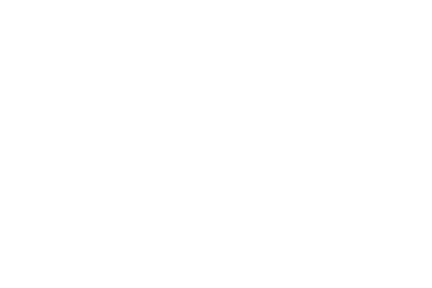

<IPython.core.display.Javascript object>


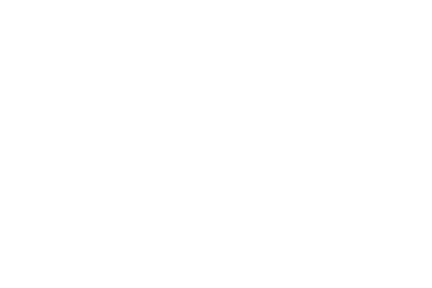

In [10]:
a  = np.random.rand(2,2)
b = np.random.rand(1,2)
a,b=np.array([[1., 0.],[0.,1.]]), np.array([[0.,0.]])
pts,cur=a,b

c, s = np.cos(np.pi/3), np.sin(np.pi/3)
R = np.array([[c, -s], [s, c]])

# Find the third point of equilateral triangle nearest to a third point
def eq_tri(pts, cur):
    #diff = pts[1] - pts[0]
    res =  pts + np.linalg.multi_dot([R, pts.T, np.array([[-1,1],[1, -1]])]).T
    print pts, res, cur, np.repeat(cur,2,axis=0)
    print pts.shape, res.shape, cur.shape, np.repeat(cur,2,axis=0).shape
    idx = (np.linalg.norm(res-np.repeat(cur,2,axis=0),axis=1)).argmin()
    print pts, cur, idx
    return res[idx]

diff = pts[1] - pts[0]
print [x for x in [R, diff.reshape(2,1), np.array([[-1],[1]])]]
res =  pts + np.linalg.multi_dot([R, pts.T, -np.array([[1,-1],[-1, 1]])]).T
idx = (np.linalg.norm(res-[b]*2,axis=2)).argmin()
print 'foo', res, b, res-[b]*2, np.linalg.norm(res-[b]*2,axis=2), idx
res = [eq_tri(a,b)]

print a, res
xy = np.concatenate([a,b,res])
colors = ['black', 'black', 'red', 'green', 'blue']
print xy.T
plt.close()
fig, ax = plt.subplots()
ax.scatter(*xy.T,  c=colors)
ax.set_aspect('equal', 'datalim')
plt.show()

In [42]:
 np.random.rand(2,2)

array([[ 0.28664941,  0.40509643],
       [ 0.64909176,  0.29517478]])

In [123]:
x = np.array([[-1],[1]])
x.shape

(2, 1)

In [298]:
assert True

In [62]:
def printeach(*args):
    for arg in args:
        print arg
        
printeach(*xy.T)

[ 0.67957799  0.36734394  0.5057131   0.88545672]
[ 0.57522753  0.4192969   0.18070774  0.76462089]


In [132]:
diff.reshape(1,2)

array([[ 0.08781975,  0.08840496]])

In [333]:
np.repeat(np.array([[-1,1]]),2,axis=0)

array([[-1,  1],
       [-1,  1]])